**TITLE: BINARY CLASSIFICATION OF PATIENTS AS A DIABETIC OR NON-DIABETIC WITH THE HELP OF ADELINE** 

**INTRODUCTION**

**INTUTION BEHIND WORKING OF NEURAL NETWORK**

It takes several inputs, processes it through multiple neurons from multiple hidden layers, and returns the result using an output layer. This result estimation process is technically known as “Forward Propagation“.

Next, we compare the result with actual output. The task is to make the output to the neural network as close to the actual (desired) output. Each of these neurons is contributing some error to the final output. How do you reduce the error?

We try to minimize the value/ weight of neurons that are contributing more to the error and this happens while traveling back to the neurons of the neural network and finding where the error lies. This process is known as “Backward Propagation“.

In order to reduce this number of iterations to minimize the error, the neural networks use a common algorithm known as “Gradient Descent”, which helps to optimize the task quickly and efficiently.

This is how Neural networks work.

**ADAPTIVE LINEAR NEURONS (ADALINE)**

Here is another type of single-layer neural network (NN): ADAptive LInear NEuron (Adaline). Adaline was published by Bernard Widrow and his doctoral student Tedd Hoff only a few years after Rosenblatt's perceptron algorithm, and it can be considered an improvement on the latter.

The Adaline algorithm is particularly interesting because it illustrates the key
concepts of defining and minimizing continuous cost functions. This lays the
groundwork for understanding more advanced machine learning algorithms for
classification, such as logistic regression, support vector machines, and regression models, which we will discuss in future chapters.

Adaline is a single layer neural network with multiple nodes where each node accepts multiple inputs and generates one output. Given the following variables as:

x is the input vector

w is the weight vector

n is the number of inputs

theta  some constant

y is the output of the model

then we find that the output is,

y= sum(wj*xj) + theta, j=1...n

If we further assume that

x0=1

w0=theta

then the output further reduces to: 

y=wj*xj, j=0...n

The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron. In Adaline, this linear activation function, φ(z), is simply the identity function of the net input,
so that:

φ(w'x) = w'x

While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction, which is similar to the unit step function that we covered earlier. 

The Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels.

Since the perceptron rule and Adaline are very similar, we will take the perceptron implementation that we defined earlier and change the fit method so that the weights are updated by minimizing the cost function via gradient descent



**OBJECTIVES**

Here, in this analysis our main objective is to perform a,

Binary classification to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset using Adaline. 

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the packages required for building classification model using adaline.
from sklearn.preprocessing import MinMaxScaler

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

#for visualizing tree 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

**METHODOLOGY**

DATA DESCRIPTION

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The dataset consists of 768 records and 9 variables.

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

***Target Variable***

Outcome

***Feature Variables***

Pregnancies,
Glucose,
Blood Pressure,
Skin Thickness,
Insulin,
BMI,
Diabetes,
Age



In [ ]:
#Loading the required dataset.
diabetes=pd.read_csv("/content/diabetes.csv")

#Viewing 'diabetes' data set.
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


EXPLORATORY DATA ANALYSIS

Now we perform some basic EDA on this dataset. 

In [ ]:
#Obtaining the dimension of the dataset.
diabetes.shape

(768, 9)

It is observed that the dataset comprises of 768 records and 9 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above table, it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above susummary table, we observe that the study variable Outcome (Diabetes is present or not) has mean 0.348 which is closer to zero which mens there are more zeroes in the study variable which indicates that among all the 768 patients there are more no. of patients without diabetes being detected in them. Also it can be observed that mean and median for BMI are equal therefore we may assume that the distribution of BMI is maybe symmetric. It can also be observed that the 75th percentile of BP is 80 which indicates the among all the patients 25% of them are having higher BP than normal level and 75% of them are having BP lower than normal level. On similar lines we interpret more about the data.

Let’s check the correlation of all the features with each other.

Text(0.5, 1.0, '[Figure 1]')

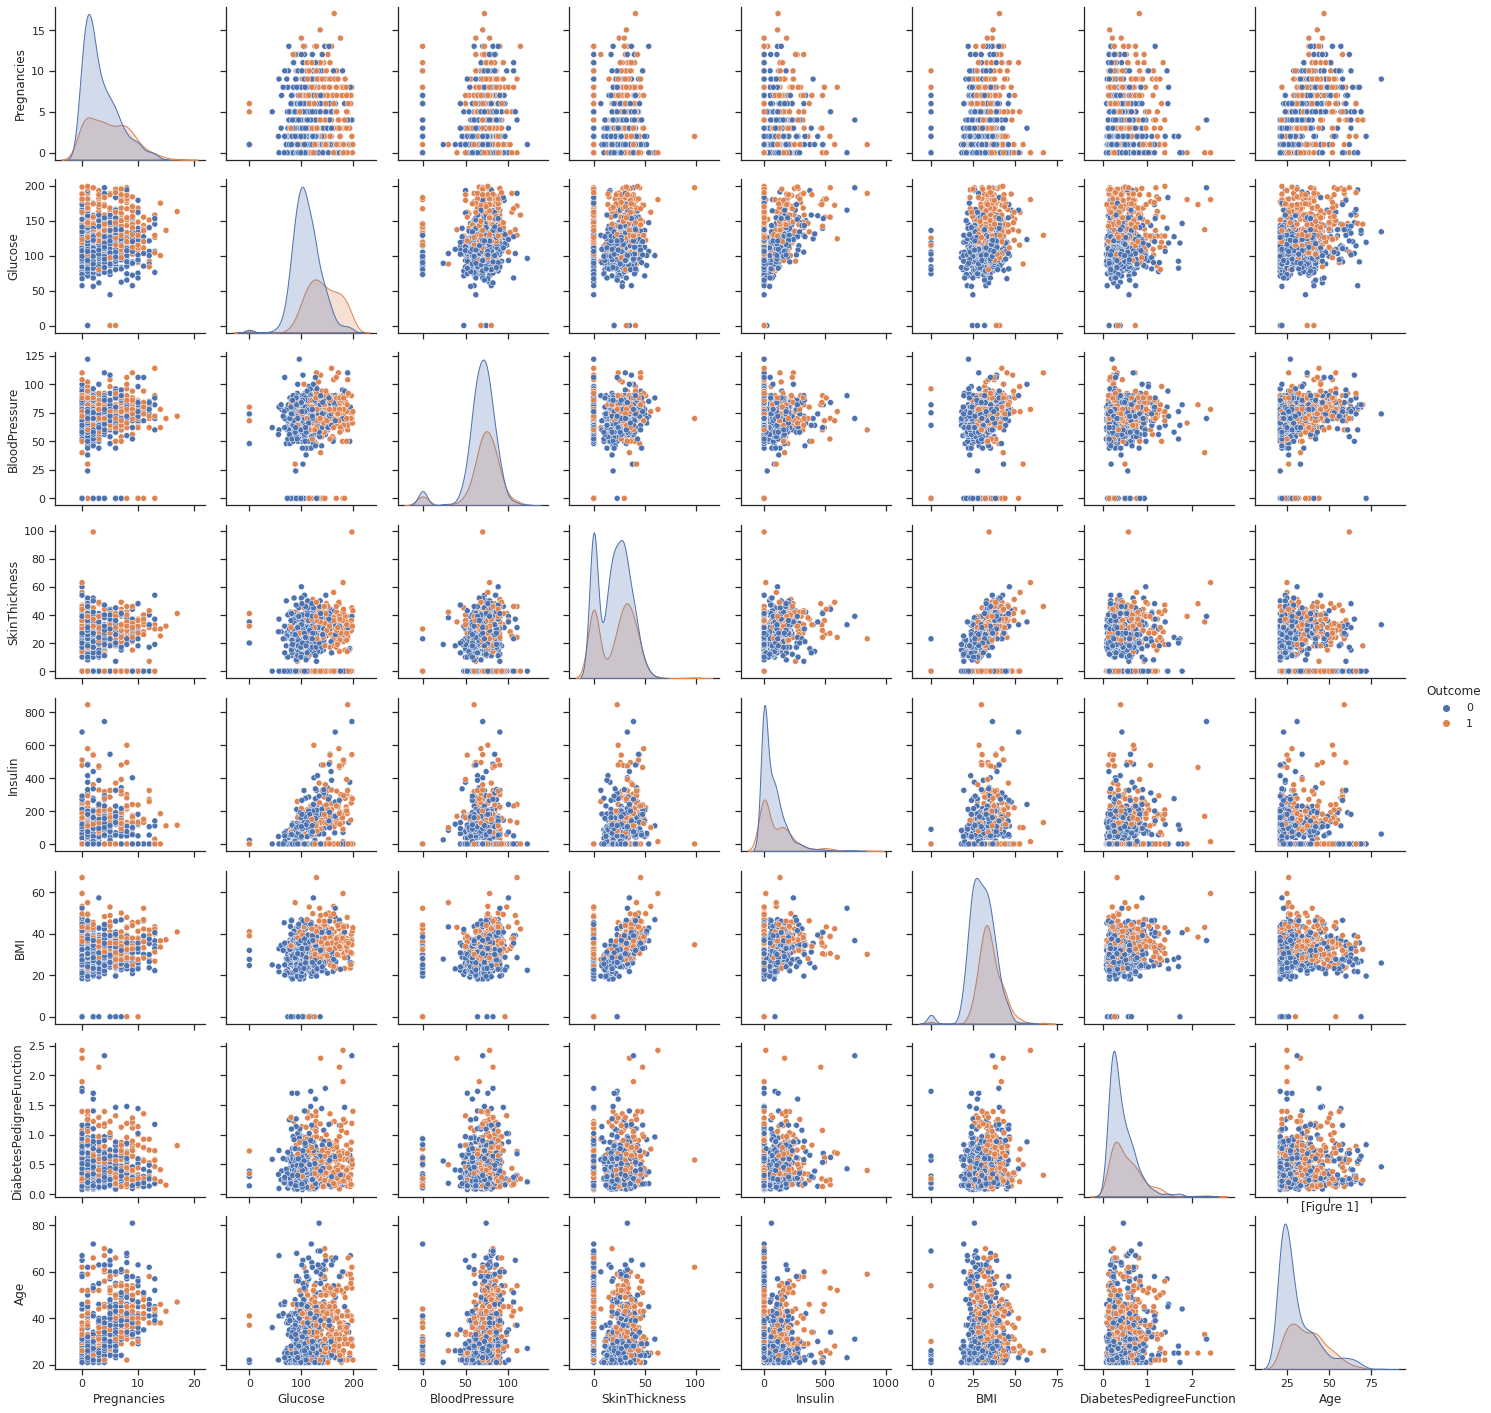

In [ ]:
#Plotting the pair plot to visualise the attributes all at once
sns.set_theme(style="ticks")
sns.pairplot(diabetes, hue = 'Outcome')
plt.title('[Figure 1]')

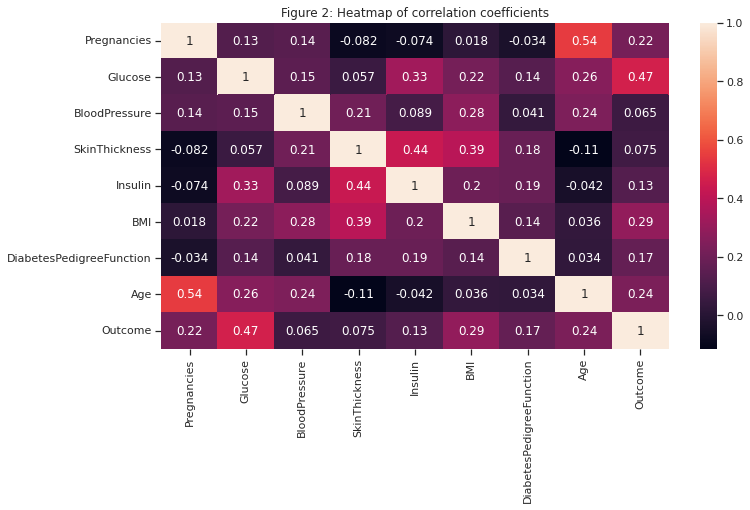

In [ ]:
#Obtaining the correlation matrix
fig=plt.figure(figsize=(25,6))
ax=fig.add_subplot(122)
sns.heatmap(diabetes.corr(), annot = True)
ax.set_title("Figure 2: Heatmap of correlation coefficients")
plt.show()

From the above plot it can be observed that the, skin thickness and pregnancies, Insulin and pregnancies, age and skin thickness are negatively correlated. It can also be observed that the age and pregnancies are higly positively related.

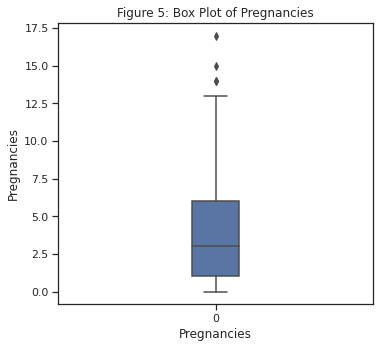

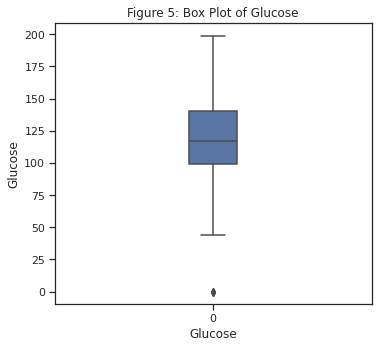

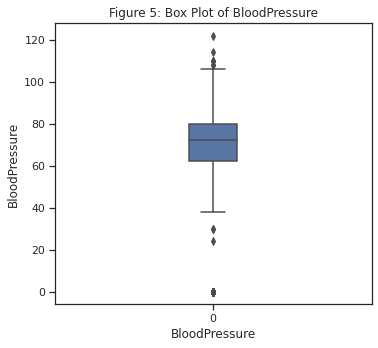

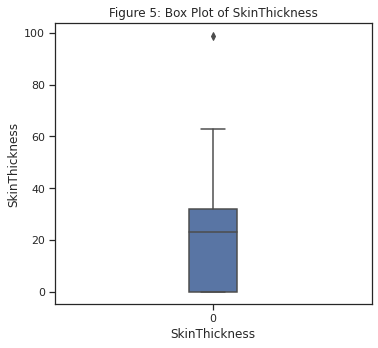

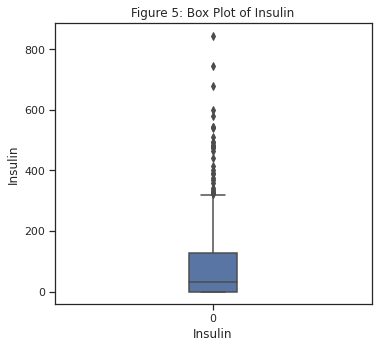

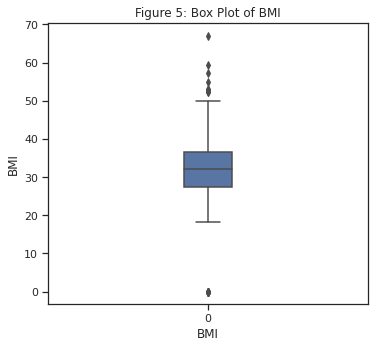

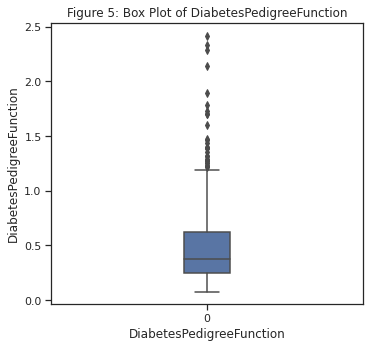

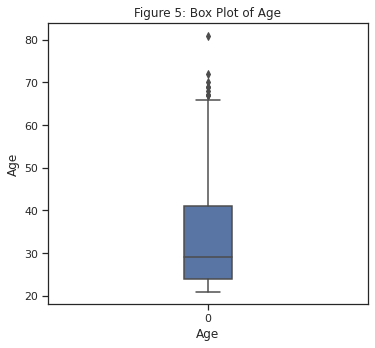

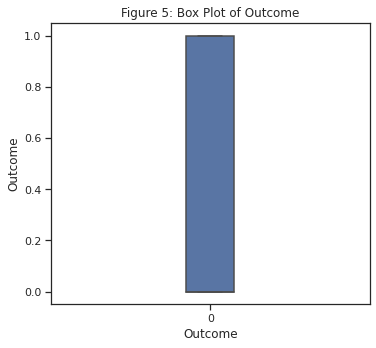

In [ ]:
#Here we obtain the boxplot for the variables to check for the outliers of the data.
data=diabetes.columns
data
value=data[0:9]
value
for i in value:
  fig=plt.figure(figsize=(10,5))
  ax=fig.add_subplot(122)
  sns.boxplot(data=diabetes[i],palette='deep',width=0.15,ax=ax)
  ax.set_title("Figure 5: Box Plot of "+i)
  ax.set_xlabel(i)
  ax.set_ylabel(i)
  plt.tight_layout()
  plt.show()

It can be observed from the above plots that there exists very few outliers in the data of some of the variables.

Thus the study variable is coverted into binary form of 0s and 1s, where **0 indicating non-diabetic patients** and **1 indicating  diabetic patients**.

Further in the table below we obtained the counts of diabetic and non diabetic patients.

**ANALYSIS**

In [ ]:
#Counts of each classes in study variable(status of a country)
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#Obtaining the percentage of proportion of each classes of patients(non-diabetic or diabetic).
count_non_diabetic = len(diabetes[diabetes['Outcome']==0])
count_diabetic = len(diabetes[diabetes['Outcome']==1])
pct_of_non_diabetic = count_non_diabetic/(count_non_diabetic+count_diabetic)
print("percentage of proportion of non-diabetic patients", pct_of_non_diabetic*100)
pct_of_diabetic = count_diabetic/(count_non_diabetic+count_diabetic)
print("percentage of  of diabetic patients", pct_of_diabetic*100)

percentage of proportion of non-diabetic patients 65.10416666666666
percentage of  of diabetic patients 34.89583333333333


In [ ]:
#Coverting all the 0s in dependent variable to -1 since our dependent variable should have values 1 and -1.
diabetes['Outcome']=np.where(diabetes['Outcome']==0,-1, diabetes['Outcome'])

In [ ]:
#Veiwing the dataset again
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,-1
764,2,122,70,27,0,36.8,0.340,27,-1
765,5,121,72,23,112,26.2,0.245,30,-1
766,1,126,60,0,0,30.1,0.349,47,1


Thus, it can be observed from the above table that the dependent variable has values either 1 'diabetic' or -1 'non-diabeteic'.

**MODELLING**

BINARY CLASSIFICATION USING ADALINE

In [ ]:
#Python code of Adaline algorithm custom implementation.
class AdalineGD(object):

  """ADAptive LInear NEuron classifier.
  Parameters
  ------------
  eta : float
  Learning rate (between 0.0 and 1.0)
  n_iter : int
  Passes over the training dataset.
  Attributes
  -----------
  w_ : 1d-array
  Weights after fitting.
  errors_ : list
  Number of misclassifications in every epoch. 
  """
  def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter
  def fit(self, X, y):
    """ Fit training data.
    Parameters
    ----------
    X : {array-like}, shape = [n_samples, n_features]
    Training vectors, where n_samples is the number of samples and
    n_features is the number of features.
    y : array-like, shape = [n_samples]
    Target values.
    Returns
    -------
    self : object

    """
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):
    """Compute linear activation"""
    return self.net_input(X)
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(X) >=0, 1, -1)

Now, we will separate the target variable(y) and features(X) as follows

In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X=diabetes.drop(['Outcome'],axis=1)

#Extracting the variable y i.e. independent variable.
y=diabetes["Outcome"]

In [ ]:
#Standardization of independent variables
from sklearn import preprocessing
x = preprocessing.scale(X)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
#Splitting the data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (614, 8)
Testing split input-  (154, 8)


After splitting the dataset we have 800 records(rows) for training and 200 records for testing purposes.

In [ ]:
#The diabetes diagnostic classification model trained using Adaline implementation implementation in the previous section
ada = AdalineGD(n_iter=20, eta=0.001).fit(X_train, y_train)

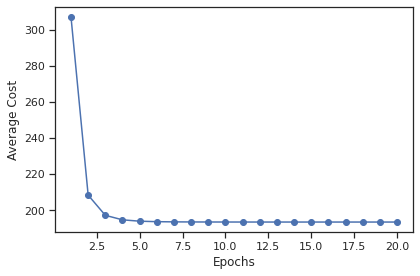

In [ ]:
#Plot the cost against the number of epochs for the learning rate 0.001 rates:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

In [ ]:
#We collect the cost values list to check whether the algorithm converged after training.
ada.cost_

[307.0,
 208.26528874983865,
 197.07581246899355,
 194.57209230035926,
 193.8182392419127,
 193.54963772180645,
 193.44154102202714,
 193.39335673969126,
 193.36995003316883,
 193.35778990709306,
 193.35116216392137,
 193.3474331154964,
 193.3452926530656,
 193.34404902310905,
 193.34332121319903,
 193.3428934547575,
 193.34264141595136,
 193.34249269427366,
 193.34240486167852,
 193.34235296282174]

In [ ]:
#Calculating the weights after fitting
ada.w_

array([-0.29595219,  0.07063626,  0.35978269, -0.08816707,  0.01656345,
       -0.06375059,  0.23715295,  0.07372392,  0.15171719])

In [ ]:
#Predicting the values of test data.
y_pred = ada.predict(X_test)

#Obtaining the classification report.
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

          -1       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



It is observed from the above classification report that the precision of a classifier is 0.82 with respect to classes of patient not having diabetes and 0.66 with respect to classes of patient having diabetes which means the ability of the classifier to not make wrong predictions in case of non-diabetic patients is 82% which is good and in case of diabeteic patient is 66% which is not very good value but a better value for precision.

It is also observed that the recall for the classifier is  0.81 with respect to classes of patient not having diabetes and 0.67 with respect to classes of patient having diabetes i.e. the model is 81% and 67% good at predicting making the correct predictions in case of non-diabetic and diabetic patients respectively.

We know that the f1 score is helpful in understanding the overall performance of the model by taking into account both precision and recall and from the above classification report we observe that the f1-score with respect to non diabetic and diabetic classes of patients are 0.81 and 0.67 respectively which indicates that more weightage is given to precision than recall that is the classifier will be more likely to not make wrong predictions.  



Now, we proceed to obtain the confusion matrix to check for accuracy and performance of the model.

In [ ]:
#Obtaining the confusion matrix
confusion_matrix(y_test, y_pred)

array([[80, 19],
       [18, 37]])

From the above matrix we observe that 117 correct predictions are made for the test data that is 117 i.e. 80 actually non-diabetic patients were correctly predicted as non-diabetic patient and 37 actually diabetic patients were predicted as diabetic using the above classifier and only 37 wrong predictions were made using the classifier that is 19 actually non-diabetic patients were pedicted as diabetic and 18 who were actually diabetic and predicted as non diabetic using the above decision tree classifier. Thus, we can say that the above classifier is good in making correct predictions.



In [ ]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100
print('ADALINE accuracy: %.2f%%' % accuracy)

ADALINE accuracy: 75.97%


It can also be observed that the accuracy is 0.7597 which means that the decison tree classifier is accurate 75.97% of times.

**CONCLUSION**

From the above analysis it is observed that the binary classifier modeled using adaline has accuracy of 75.97 which is a moderately good accuracy level to be possesed by a classifier. It is also observed from the report that the classifier is good in making correct predictions.
